In [1]:
import matplotlib.pyplot as plt
import numpy as np
from enmspring.graphs_bigtraj import ProminentModesBackbone
from enmspring.abbr import Abbreviation

rootfolder = '/home/ytcdata/bigtraj_fluctmatch/500ns'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
interval_time = 500
p_agent = ProminentModes(host, rootfolder, interval_time)

/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/0_500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/250_750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/500_1000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/750_1250/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1000_1500/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1250_1750/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1500_2000/pd_dfs exists
Read Dataframe of stacking: df_st
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1750_2250/pd_dfs exists


### Part 2: Initialize all small agents

In [3]:
execute = False
if execute:
    p_agent.initialize_small_agents()

Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to STRAND1.
There are 189 eigenvectors belonging to STRAND2.
Sum of two strands: 399
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 210 eigenvectors belonging to ST

### Part 3: Make/Read $\left< r_{\alpha '}\right>$

In [4]:
p_agent.set_mean_r_alpha_array()
p_agent.save_mean_r_alpha_array()

Save mean_r_alpha_array into /home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy/mean_r_alpha.npy


In [3]:
p_agent.load_mean_r_alpha_array()

Load mean_r_alpha_array from /home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy/mean_r_alpha.npy


### Part 4: Plot

In [3]:
hosts = ['a_tract_21mer', 'tat_21mer', 'g_tract_21mer', 'gcgc_21mer']
d_axes_col_row = {'a_tract_21mer': (0,0), 'tat_21mer': (0,1), 'g_tract_21mer': (1,0), 'gcgc_21mer': (1,1)}
d_data = dict()
for host in hosts:
    p_agent = ProminentModesBackbone(host, rootfolder, interval_time)
    p_agent.load_mean_r_alpha_array()
    d_data[host] = {'mean_r_alpha_array': p_agent.mean_r_alpha_array, 'lambda_array': p_agent.mean_modes_w}

/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/mean_mode_npy exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/0_500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/250_750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/500_1000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/750_1250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1000_1500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1250_1750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1500_2000/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/1750_2250/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/2000_2500/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/2250_2750/pd_dfs exists
/home/ytcdata/bigtraj_fluctmatch/500ns/a_tract_21mer/bdna+bdna/2

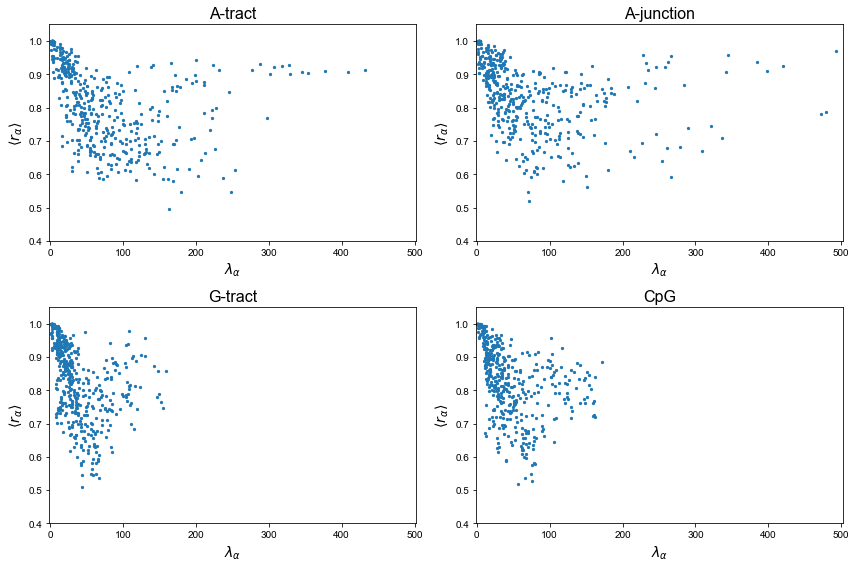

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), facecolor="white")

ylims = (0.4, 1.05)
xlims = (-1,502)

for host in hosts:
    ax = axes[d_axes_col_row[host]]
    x = d_data[host]['lambda_array']
    y = d_data[host]['mean_r_alpha_array']
    ax.scatter(x, y, s=5)
    ax.set_xlabel(r'$\lambda_{\alpha}$', fontsize=14)
    ax.set_ylabel(r'$\left< r_{\alpha}\right>$', fontsize=14)
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    title = Abbreviation.get_abbreviation(host)
    ax.set_title(title,fontsize=16)

plt.tight_layout()
#plt.savefig('/home/yizaochen/Desktop/drawzone_temp/prominent_mode_backbone_500ns.png', dpi=200, transparent=False)
plt.show()

### Batch Run

In [ ]:
hosts = ['a_tract_21mer', 'g_tract_21mer', 'gcgc_21mer', 'tat_21mer']
interval_time = 500
for host in hosts:
    p_agent = ProminentModesBackbone(host, rootfolder, interval_time)
    #p_agent.initialize_small_agents()
    #p_agent.set_mean_r_alpha_array()
    #p_agent.save_mean_r_alpha_array()